In [69]:
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters
from experiments_core import save_excel_results

from nltk.corpus import stopwords

%matplotlib inline

In [70]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])
importlib.reload(sys.modules[save_excel_results.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
files_path = 'data/satirical_real_news_tweets/'
all_files = glob.glob(files_path + "/*.csv")
print("Numero de archivos:", len(all_files))
original_news_df = pd.DataFrame()
files_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep='\t')
    files_list.append(df)
original_news_df = pd.concat(files_list, ignore_index=True)
original_news_df = original_news_df.drop(columns=['Unnamed: 0'])
print(original_news_df.describe())
print(original_news_df.head())

Numero de archivos: 16
                                                     text target
count                                               10000  10000
unique                                               9992      2
top     Bertín Osborne: «Pagar impuestos es de mariqui...   real
freq                                                    2   5000
                                                text target
0  Las lágrimas de un niño con autismo en un conc...   real
1  Vender carne de mono por ternera https://t.co/...   real
2  #Psicología Si buscas olvido en internet, verá...   real
3  El cantante congoleño Papa Wemba fallece en pl...   real
4  #Lomásvisto Vender carne de mono por ternera h...   real


In [4]:
total_data_content = original_news_df.text
total_data_target = original_news_df.target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=60)

In [65]:
print("Reales entrenamiento:", len(y_train[y_train == 'real']))
print("Fakes entrenamiento:", len(y_train[y_train == 'fake']))
print("Reales pruebas:", len(y_test[y_test == 'real']))
print("Fakes pruebas:", len(y_test[y_test == 'fake']))

Reales entrenamiento: 3485
Fakes entrenamiento: 3515
Reales pruebas: 1515
Fakes pruebas: 1485


# Experimentos con el clasificador Regresion Logistica
Los siguientes son los experimentos realizados para el clasificador Regresion Logistica y con los diferentes metodos de ponderación para el modelo de espacio vectorial.

# Linea base

In [7]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [8]:
parameters_nb = {'alpha': [4, 3, 2, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

## Linea base y parametros optimos para la Regresion Lineal

### TF BaseLine

In [9]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_nb, MultinomialNB())

random state:  10
train time: 1.637s
random state:  20
train time: 1.553s
random state:  30
train time: 1.826s
random state:  40
train time: 1.905s
random state:  50
train time: 1.737s
random state:  60
train time: 1.765s
random state:  70
train time: 1.942s
random state:  80
train time: 1.635s
random state:  90
train time: 1.804s
random state:  100
train time: 1.947s
CPU times: user 8.66 s, sys: 5.88 s, total: 14.5 s
Wall time: 21 s


Numero de caracteristicas:  (7000, 23369)

Best score selected:  0.8877142857142857
Best Accuracy:  0.892
Best Best F1-score:  0.8918492619045923
Best random state:  60
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8877142857142857
alpha: 1


Exactitud: 0.892
F1_score: 0.8918492619045923
Precision: 0.8933214495639766
Recall: 0.8917158382504917

             precision    recall  f1-score   support

       fake     0.9138    0.8633    0.8878      1485
       real     0.8729    0.9201    0.8959      1515

avg / total     0.8931    0.8920    0.8919      3000

[[1282  203]
 [ 121 1394]]

Confusion matrix, without normalization
[[1282  203]
 [ 121 1394]]


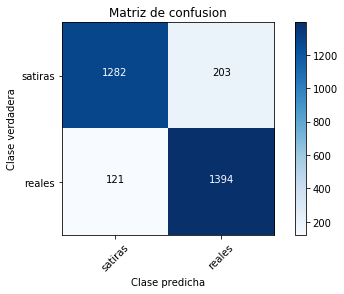

In [11]:
print_baseline_results(tf_baseline_results, parameters_nb)

### TF-IDF BaseLine

In [12]:
%%time
tf_idf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_nb, MultinomialNB())

random state:  10
train time: 1.839s
random state:  20
train time: 1.753s
random state:  30
train time: 1.750s
random state:  40
train time: 1.708s
random state:  50
train time: 1.680s
random state:  60
train time: 1.759s
random state:  70
train time: 1.787s
random state:  80
train time: 1.808s
random state:  90
train time: 1.449s
random state:  100
train time: 1.508s
CPU times: user 8.59 s, sys: 5.92 s, total: 14.5 s
Wall time: 20.5 s


Numero de caracteristicas:  (7000, 23364)

Best score selected:  0.8801428571428571
Best Accuracy:  0.877
Best Best F1-score:  0.8769885052592137
Best random state:  40
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8801428571428571
alpha: 0.1


Exactitud: 0.877
F1_score: 0.8769885052592137
Precision: 0.8773417496894567
Recall: 0.8771034268189697

             precision    recall  f1-score   support

       fake     0.8642    0.8926    0.8782      1490
       real     0.8905    0.8616    0.8758      1510

avg / total     0.8774    0.8770    0.8770      3000

[[1330  160]
 [ 209 1301]]

Confusion matrix, without normalization
[[1330  160]
 [ 209 1301]]


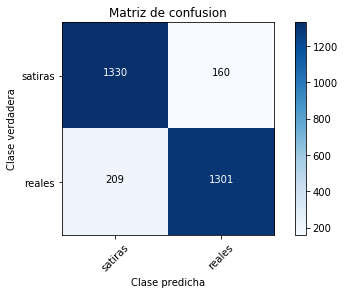

In [13]:
print_baseline_results(tf_idf_baseline_results, parameters_nb)

### Binary BaseLine

In [14]:
%%time
binary_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_nb, MultinomialNB())

random state:  10
train time: 2.273s
random state:  20
train time: 2.355s
random state:  30
train time: 2.547s
random state:  40
train time: 2.483s
random state:  50
train time: 2.211s
random state:  60
train time: 2.365s
random state:  70
train time: 2.177s
random state:  80
train time: 2.321s
random state:  90
train time: 2.109s
random state:  100
train time: 2.172s
CPU times: user 9.8 s, sys: 10.4 s, total: 20.2 s
Wall time: 26.7 s


Numero de caracteristicas:  (7000, 23369)

Best score selected:  0.8861428571428571
Best Accuracy:  0.89
Best Best F1-score:  0.8899400784871763
Best random state:  60
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8861428571428571
alpha: 1


Exactitud: 0.89
F1_score: 0.8899400784871763
Precision: 0.8903414590727534
Recall: 0.8898556522318899

             precision    recall  f1-score   support

       fake     0.8997    0.8754    0.8874      1485
       real     0.8810    0.9043    0.8925      1515

avg / total     0.8902    0.8900    0.8900      3000

[[1300  185]
 [ 145 1370]]

Confusion matrix, without normalization
[[1300  185]
 [ 145 1370]]


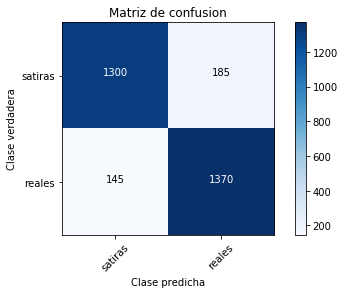

In [15]:
print_baseline_results(binary_baseline_results, parameters_nb)

In [73]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

### TF BaseLine

Numero de caracteristicas:  (7000, 23369)

train time: 2.224s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8877142857142857
alpha: 1

Exactitud: 0.892
F1_score: 0.8918492619045923
Precision: 0.8933214495639766
Recall: 0.8917158382504917

             precision    recall  f1-score   support

       fake     0.9138    0.8633    0.8878      1485
       real     0.8729    0.9201    0.8959      1515

avg / total     0.8931    0.8920    0.8919      3000

[[1282  203]
 [ 121 1394]]

Confusion matrix, without normalization
[[1282  203]
 [ 121 1394]]
CPU times: user 1.06 s, sys: 1.57 s, total: 2.63 s
Wall time: 2.77 s


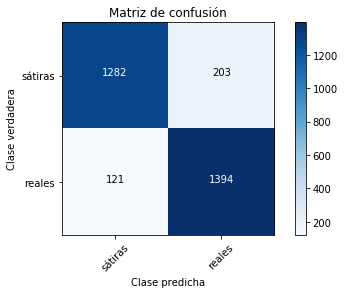

In [74]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_baseline)

### TF-IDF BaseLine

Numero de caracteristicas:  (7000, 23364)

train time: 1.853s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8801428571428571
alpha: 0.1

Exactitud: 0.877
F1_score: 0.8769885052592137
Precision: 0.8773417496894567
Recall: 0.8771034268189697

             precision    recall  f1-score   support

       fake     0.8642    0.8926    0.8782      1490
       real     0.8905    0.8616    0.8758      1510

avg / total     0.8774    0.8770    0.8770      3000

[[1330  160]
 [ 209 1301]]

Confusion matrix, without normalization
[[1330  160]
 [ 209 1301]]
CPU times: user 980 ms, sys: 1.34 s, total: 2.32 s
Wall time: 2.32 s


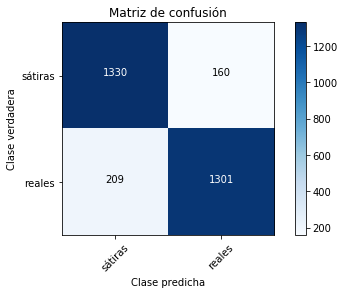

In [75]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_baseline)

### Binary BaseLine

Numero de caracteristicas:  (7000, 23369)

train time: 2.013s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8861428571428571
alpha: 1

Exactitud: 0.89
F1_score: 0.8899400784871763
Precision: 0.8903414590727534
Recall: 0.8898556522318899

             precision    recall  f1-score   support

       fake     0.8997    0.8754    0.8874      1485
       real     0.8810    0.9043    0.8925      1515

avg / total     0.8902    0.8900    0.8900      3000

[[1300  185]
 [ 145 1370]]

Confusion matrix, without normalization
[[1300  185]
 [ 145 1370]]
CPU times: user 860 ms, sys: 1.57 s, total: 2.43 s
Wall time: 2.44 s


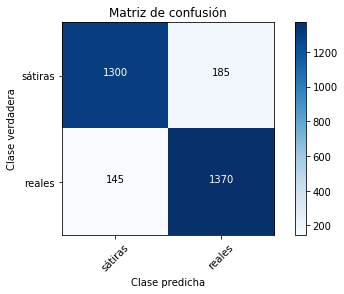

In [76]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [77]:
spanish_stopwords = stopwords.words('spanish')

In [78]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

### TF stop words

Numero de caracteristicas:  (7000, 23179)

train time: 2.031s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8852857142857142
alpha: 1

Exactitud: 0.8926666666666667
F1_score: 0.8924709159429788
Precision: 0.8945289958882208
Recall: 0.8923292329232924

             precision    recall  f1-score   support

       fake     0.9193    0.8586    0.8879      1485
       real     0.8698    0.9261    0.8971      1515

avg / total     0.8943    0.8927    0.8925      3000

[[1275  210]
 [ 112 1403]]

Confusion matrix, without normalization
[[1275  210]
 [ 112 1403]]
CPU times: user 888 ms, sys: 1.48 s, total: 2.36 s
Wall time: 2.45 s


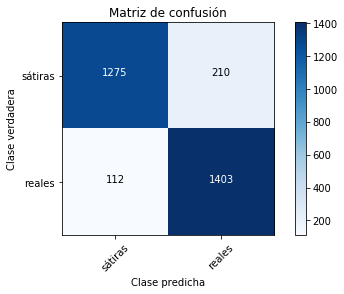

In [79]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_stopwords)

### TF-IDF stop words

Numero de caracteristicas:  (7000, 23175)

train time: 2.049s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8734285714285714
alpha: 0.1

Exactitud: 0.8753333333333333
F1_score: 0.8753324468085106
Precision: 0.8754273948781958
Recall: 0.8753900173341037

             precision    recall  f1-score   support

       fake     0.8676    0.8839    0.8757      1490
       real     0.8833    0.8669    0.8750      1510

avg / total     0.8755    0.8753    0.8753      3000

[[1317  173]
 [ 201 1309]]

Confusion matrix, without normalization
[[1317  173]
 [ 201 1309]]
CPU times: user 880 ms, sys: 1.56 s, total: 2.44 s
Wall time: 2.45 s


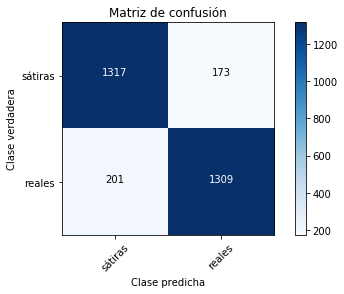

In [80]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

### Binary stop words

Numero de caracteristicas:  (7000, 23179)

train time: 2.107s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8808571428571429
alpha: 1

Exactitud: 0.8886666666666667
F1_score: 0.8885618652919813
Precision: 0.8894362076779211
Recall: 0.8884488448844885

             precision    recall  f1-score   support

       fake     0.9044    0.8667    0.8851      1485
       real     0.8744    0.9102    0.8920      1515

avg / total     0.8893    0.8887    0.8886      3000

[[1287  198]
 [ 136 1379]]

Confusion matrix, without normalization
[[1287  198]
 [ 136 1379]]
CPU times: user 932 ms, sys: 1.68 s, total: 2.61 s
Wall time: 2.55 s


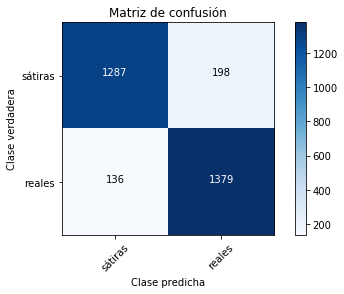

In [81]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [82]:
#Prueba de tokenize_stems
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [83]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

### TF stemming

Numero de caracteristicas:  (7000, 17645)

train time: 1.873s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8784285714285714
alpha: 1

Exactitud: 0.879
F1_score: 0.8788400554109264
Precision: 0.8801796744905772
Recall: 0.8787245391205787

             precision    recall  f1-score   support

       fake     0.8990    0.8512    0.8744      1485
       real     0.8614    0.9063    0.8832      1515

avg / total     0.8800    0.8790    0.8789      3000

[[1264  221]
 [ 142 1373]]

Confusion matrix, without normalization
[[1264  221]
 [ 142 1373]]
CPU times: user 4.98 s, sys: 1.46 s, total: 6.44 s
Wall time: 6.42 s


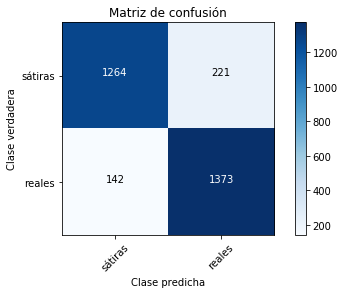

In [84]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_stemming)

### TF-IDF stemming

Numero de caracteristicas:  (7000, 17683)

train time: 1.845s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8708571428571429
alpha: 0.1

Exactitud: 0.8686666666666667
F1_score: 0.8686666666666667
Precision: 0.8687052757900351
Recall: 0.8687052757900351

             precision    recall  f1-score   support

       fake     0.8629    0.8745    0.8687      1490
       real     0.8745    0.8629    0.8687      1510

avg / total     0.8687    0.8687    0.8687      3000

[[1303  187]
 [ 207 1303]]

Confusion matrix, without normalization
[[1303  187]
 [ 207 1303]]
CPU times: user 5.56 s, sys: 1.39 s, total: 6.94 s
Wall time: 6.93 s


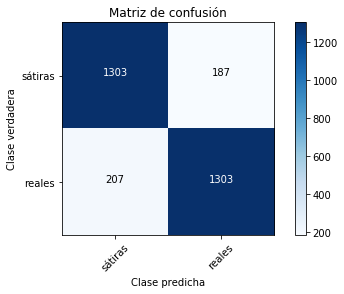

In [85]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_stemming)

### Binary stemming

Numero de caracteristicas:  (7000, 17645)

train time: 1.647s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8768571428571429
alpha: 1

Exactitud: 0.8796666666666667
F1_score: 0.8796168949406749
Precision: 0.8798705805103821
Recall: 0.8795512884621796

             precision    recall  f1-score   support

       fake     0.8865    0.8680    0.8772      1485
       real     0.8732    0.8911    0.8821      1515

avg / total     0.8798    0.8797    0.8796      3000

[[1289  196]
 [ 165 1350]]

Confusion matrix, without normalization
[[1289  196]
 [ 165 1350]]
CPU times: user 5.02 s, sys: 1.19 s, total: 6.21 s
Wall time: 6.14 s


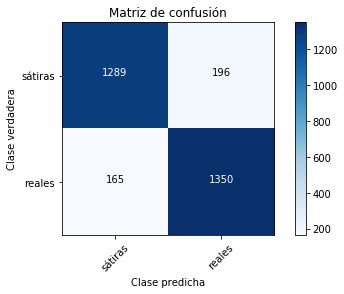

In [86]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [87]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [88]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

### TF lemmatize

Numero de caracteristicas:  (7000, 18669)

train time: 1.955s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8777142857142857
alpha: 1

Exactitud: 0.8773333333333333
F1_score: 0.8772460416296033
Precision: 0.8778261401965914
Recall: 0.8771543821048772

             precision    recall  f1-score   support

       fake     0.8892    0.8593    0.8740      1485
       real     0.8665    0.8950    0.8805      1515

avg / total     0.8777    0.8773    0.8773      3000

[[1276  209]
 [ 159 1356]]

Confusion matrix, without normalization
[[1276  209]
 [ 159 1356]]
CPU times: user 892 ms, sys: 1.42 s, total: 2.32 s
Wall time: 2.41 s


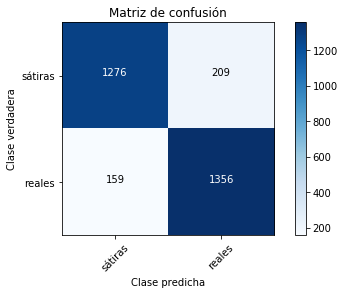

In [89]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_lemmatize)

### TF-IDF lemmatize

Numero de caracteristicas:  (7000, 18712)

train time: 2.106s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.869
alpha: 0.1

Exactitud: 0.879
F1_score: 0.8789928874708302
Precision: 0.8792568936698695
Recall: 0.8790901817858572

             precision    recall  f1-score   support

       fake     0.8676    0.8926    0.8799      1490
       real     0.8909    0.8656    0.8781      1510

avg / total     0.8793    0.8790    0.8790      3000

[[1330  160]
 [ 203 1307]]

Confusion matrix, without normalization
[[1330  160]
 [ 203 1307]]
CPU times: user 968 ms, sys: 1.54 s, total: 2.5 s
Wall time: 2.6 s


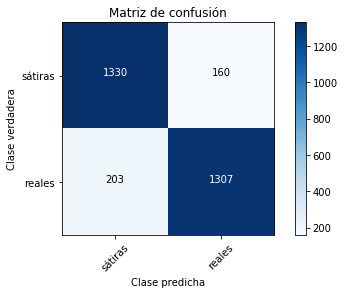

In [90]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

### Binary lemmatize

Numero de caracteristicas:  (7000, 18669)

train time: 2.060s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8785714285714286
alpha: 1

Exactitud: 0.8746666666666667
F1_score: 0.8746486160673803
Precision: 0.87467010200666
Recall: 0.8746341300796746

             precision    recall  f1-score   support

       fake     0.8749    0.8714    0.8731      1485
       real     0.8744    0.8779    0.8762      1515

avg / total     0.8747    0.8747    0.8747      3000

[[1294  191]
 [ 185 1330]]

Confusion matrix, without normalization
[[1294  191]
 [ 185 1330]]
CPU times: user 984 ms, sys: 1.54 s, total: 2.53 s
Wall time: 2.59 s


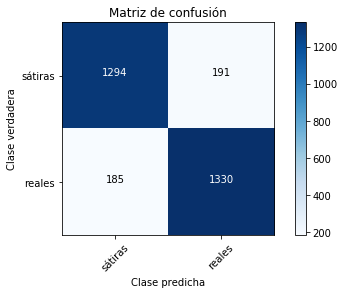

In [91]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [92]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [93]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

### TF sin URLs

Numero de caracteristicas:  (7000, 15636)

train time: 2.253s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8522857142857143
alpha: 1

Exactitud: 0.8563333333333333
F1_score: 0.8561891229816566
Precision: 0.8570823676234622
Recall: 0.856102276894356

             precision    recall  f1-score   support

       fake     0.8711    0.8330    0.8516      1485
       real     0.8430    0.8792    0.8607      1515

avg / total     0.8569    0.8563    0.8562      3000

[[1237  248]
 [ 183 1332]]

Confusion matrix, without normalization
[[1237  248]
 [ 183 1332]]
CPU times: user 1.04 s, sys: 1.54 s, total: 2.58 s
Wall time: 2.76 s


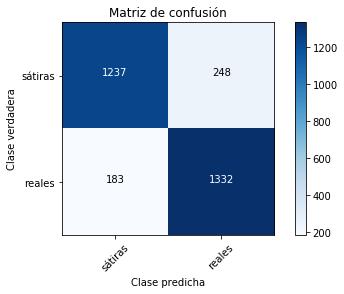

In [94]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_no_urls)

### TF-IDF sin URLs

Numero de caracteristicas:  (7000, 15613)

train time: 1.955s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8568571428571429
alpha: 0.1

Exactitud: 0.8466666666666667
F1_score: 0.8466445834866889
Precision: 0.8467130569006511
Recall: 0.8466242944130851

             precision    recall  f1-score   support

       fake     0.8494    0.8403    0.8448      1490
       real     0.8440    0.8530    0.8485      1510

avg / total     0.8467    0.8467    0.8467      3000

[[1252  238]
 [ 222 1288]]

Confusion matrix, without normalization
[[1252  238]
 [ 222 1288]]
CPU times: user 1.02 s, sys: 1.5 s, total: 2.51 s
Wall time: 2.45 s


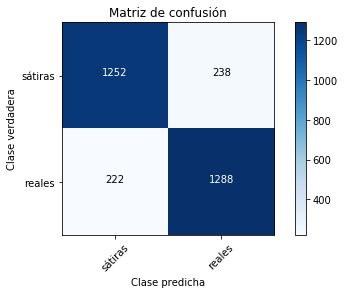

In [95]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

### Binary sin URLs

Numero de caracteristicas:  (7000, 15636)

train time: 2.075s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8512857142857143
alpha: 1

Exactitud: 0.856
F1_score: 0.8558759892956784
Precision: 0.8566012569325304
Recall: 0.8557922458912558

             precision    recall  f1-score   support

       fake     0.8690    0.8350    0.8516      1485
       real     0.8442    0.8766    0.8601      1515

avg / total     0.8565    0.8560    0.8559      3000

[[1240  245]
 [ 187 1328]]

Confusion matrix, without normalization
[[1240  245]
 [ 187 1328]]
CPU times: user 920 ms, sys: 1.61 s, total: 2.53 s
Wall time: 2.53 s


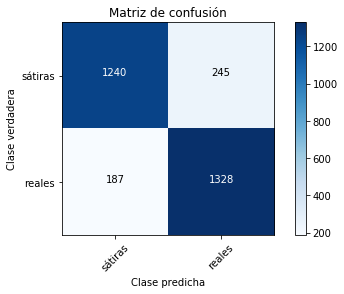

In [96]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [97]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [98]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

### TF sin letras repetidas

Numero de caracteristicas:  (7000, 23296)

train time: 2.108s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8875714285714286
alpha: 1

Exactitud: 0.891
F1_score: 0.8908451335010751
Precision: 0.8923480491841621
Recall: 0.8907124045737906

             precision    recall  f1-score   support

       fake     0.9130    0.8620    0.8867      1485
       real     0.8717    0.9195    0.8950      1515

avg / total     0.8921    0.8910    0.8909      3000

[[1280  205]
 [ 122 1393]]

Confusion matrix, without normalization
[[1280  205]
 [ 122 1393]]
CPU times: user 2.05 s, sys: 1.6 s, total: 3.64 s
Wall time: 3.72 s


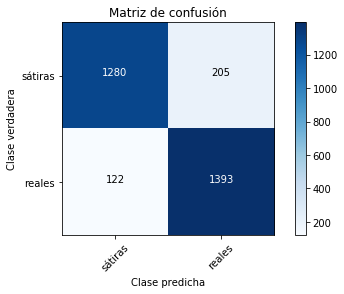

In [99]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_norm_letters)

### TF-IDF sin letras repetidas

Numero de caracteristicas:  (7000, 23276)

train time: 1.963s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8795714285714286
alpha: 0.1

Exactitud: 0.8786666666666667
F1_score: 0.8786560962643857
Precision: 0.8789943412572336
Recall: 0.8787679452420107

             precision    recall  f1-score   support

       fake     0.8661    0.8940    0.8798      1490
       real     0.8919    0.8636    0.8775      1510

avg / total     0.8791    0.8787    0.8786      3000

[[1332  158]
 [ 206 1304]]

Confusion matrix, without normalization
[[1332  158]
 [ 206 1304]]
CPU times: user 2.14 s, sys: 1.51 s, total: 3.65 s
Wall time: 3.66 s


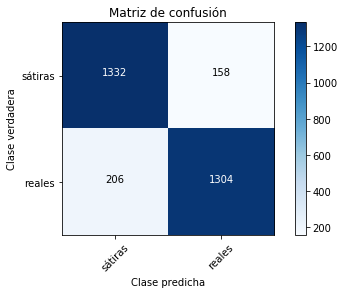

In [100]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

### Binary sin letras repetidas

Numero de caracteristicas:  (7000, 23296)

train time: 1.875s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8855714285714286
alpha: 1

Exactitud: 0.8883333333333333
F1_score: 0.8882671750862261
Precision: 0.8887211813573717
Recall: 0.8881788178817882

             precision    recall  f1-score   support

       fake     0.8988    0.8727    0.8855      1485
       real     0.8787    0.9036    0.8910      1515

avg / total     0.8886    0.8883    0.8883      3000

[[1296  189]
 [ 146 1369]]

Confusion matrix, without normalization
[[1296  189]
 [ 146 1369]]
CPU times: user 2.1 s, sys: 1.37 s, total: 3.46 s
Wall time: 3.5 s


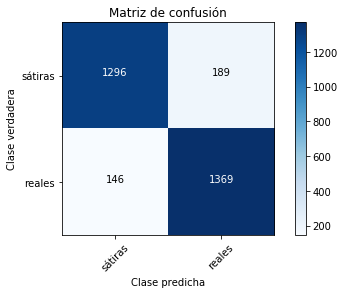

In [101]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [102]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

### TF pruning < 10

Numero de caracteristicas:  (7000, 1226)

train time: 1.996s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8442857142857143
alpha: 1

Exactitud: 0.8473333333333334
F1_score: 0.8469507101086049
Precision: 0.8497160332022717
Recall: 0.846918025135847

             precision    recall  f1-score   support

       fake     0.8762    0.8054    0.8393      1485
       real     0.8232    0.8884    0.8546      1515

avg / total     0.8495    0.8473    0.8470      3000

[[1196  289]
 [ 169 1346]]

Confusion matrix, without normalization
[[1196  289]
 [ 169 1346]]
CPU times: user 868 ms, sys: 1.46 s, total: 2.32 s
Wall time: 2.43 s


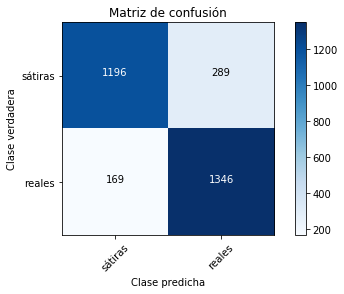

In [103]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_pruning10)

### TF-IDF pruning < 10

Numero de caracteristicas:  (7000, 1226)

train time: 2.142s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8345714285714285
alpha: 0.1

Exactitud: 0.836
F1_score: 0.8359614327101794
Precision: 0.8365935810979214
Recall: 0.836139383972621

             precision    recall  f1-score   support

       fake     0.8207    0.8570    0.8385      1490
       real     0.8525    0.8152    0.8334      1510

avg / total     0.8367    0.8360    0.8359      3000

[[1277  213]
 [ 279 1231]]

Confusion matrix, without normalization
[[1277  213]
 [ 279 1231]]
CPU times: user 916 ms, sys: 1.64 s, total: 2.55 s
Wall time: 2.59 s


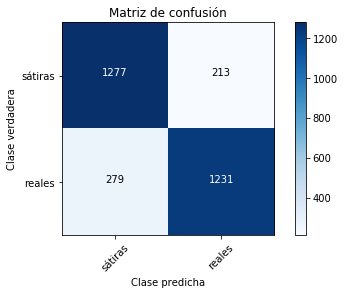

In [104]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

### Binary pruning < 10

Numero de caracteristicas:  (7000, 1226)

train time: 2.110s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8425714285714285
alpha: 1

Exactitud: 0.8393333333333334
F1_score: 0.8391886030761018
Precision: 0.8399331662489558
Recall: 0.8391172450578391

             precision    recall  f1-score   support

       fake     0.8519    0.8175    0.8344      1485
       real     0.8279    0.8607    0.8440      1515

avg / total     0.8398    0.8393    0.8392      3000

[[1214  271]
 [ 211 1304]]

Confusion matrix, without normalization
[[1214  271]
 [ 211 1304]]
CPU times: user 884 ms, sys: 1.68 s, total: 2.56 s
Wall time: 2.53 s


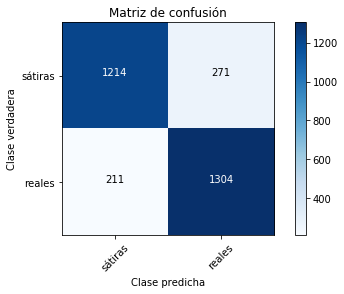

In [105]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [106]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

### TF pruning < 5

Numero de caracteristicas:  (7000, 2611)

train time: 2.164s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8622857142857143
alpha: 1

Exactitud: 0.8633333333333333
F1_score: 0.8631688927493308
Precision: 0.864319232283965
Recall: 0.863072973964063

             precision    recall  f1-score   support

       fake     0.8809    0.8370    0.8584      1485
       real     0.8477    0.8891    0.8679      1515

avg / total     0.8642    0.8633    0.8632      3000

[[1243  242]
 [ 168 1347]]

Confusion matrix, without normalization
[[1243  242]
 [ 168 1347]]
CPU times: user 1 s, sys: 1.73 s, total: 2.73 s
Wall time: 2.64 s


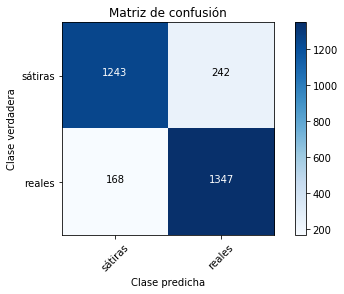

In [107]:
%%time
optimal_parameters = {'alpha': [1]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_tf_vect_pruning5)

### TF-IDF pruning < 5

Numero de caracteristicas:  (7000, 2667)

train time: 1.917s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8557142857142858
alpha: 0.1

Exactitud: 0.8456666666666667
F1_score: 0.8456501855364779
Precision: 0.8460162903929558
Recall: 0.8457731454731321

             precision    recall  f1-score   support

       fake     0.8332    0.8617    0.8472      1490
       real     0.8588    0.8298    0.8441      1510

avg / total     0.8461    0.8457    0.8456      3000

[[1284  206]
 [ 257 1253]]

Confusion matrix, without normalization
[[1284  206]
 [ 257 1253]]
CPU times: user 864 ms, sys: 1.45 s, total: 2.31 s
Wall time: 2.34 s


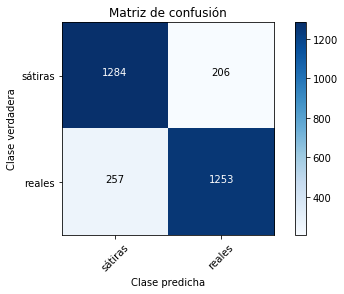

In [108]:
%%time
optimal_parameters = {'alpha': [0.1]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, MultinomialNB(), 40)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

### Binary pruning < 5

Numero de caracteristicas:  (7000, 2611)

train time: 1.902s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8617142857142858
alpha: 1

Exactitud: 0.862
F1_score: 0.8619518979057591
Precision: 0.8621338875844575
Recall: 0.8618995232856619

             precision    recall  f1-score   support

       fake     0.8670    0.8519    0.8594      1485
       real     0.8572    0.8719    0.8645      1515

avg / total     0.8621    0.8620    0.8620      3000

[[1265  220]
 [ 194 1321]]

Confusion matrix, without normalization
[[1265  220]
 [ 194 1321]]
CPU times: user 884 ms, sys: 1.42 s, total: 2.31 s
Wall time: 2.36 s


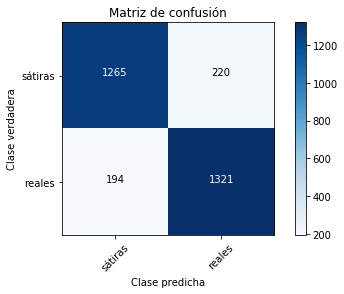

In [109]:
%%time
optimal_parameters = {'alpha': [1]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, MultinomialNB(), 60)
all_experiments_results.append(clf_binary_vect_pruning5)

In [110]:
len(all_experiments_results)

24

In [111]:
#save_excel_results("result_es_news_fakes_nb.xlsx", all_experiments_results)